In [16]:
import random
import numpy as np
import scipy as spy
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import time   #用来计算运行时间
#=======模拟数据====================== f(x) = g(x) + h(x)
n = 16              
p, q = 512, 1024          # A的shape=(p,q)
lambd = 0.1              # h前的系数
T =  15                 # 迭代T次


# 生成原始稀疏向量u
np.random.seed(0)
u= spy.sparse.rand(q,1,density=0.1,format='csc',dtype=None)
u1 = u.nonzero()
row = u1[0]
col = u1[1]

data = np.random.randn(int(0.1*q))   # data.shape = 102
u = csc_matrix((data, (row, col)), shape=(q,1)).toarray() # 1024 * 1
    
def prox(x, lambd):
    for i in range(len(x)):
        if np.abs(x[i]) > lambd:
            x[i] = np.sign(x[i]) * (np.abs(x[i]) - lambd)
        else:
            x[i] = 0
    return x


In [17]:
# 生成(y,A)
A = np.random.randn(p, q)
Y = np.dot(A,u)  # a * u, 512 * 1

a = np.zeros((n, int(p/n), q))
y = np.zeros((n, int(p/n), 1))
for i in range(n):
    a[i] = A[int(i*p/n) : int((i+1)*p/n),:]    # a.shape(4,128,1024)
    y[i] = Y[int(i*p/n) : int((i+1)*p/n),:]

In [18]:
Ci = 10

T_B

Text(0.5, 1.0, 'Reconstructed signal based on PG under constant errors(C=10)')

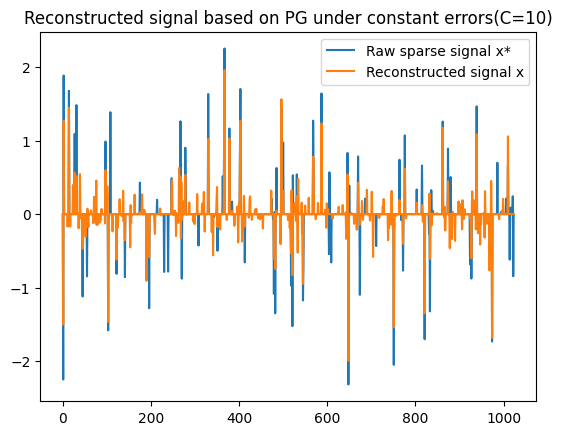

In [19]:
step = 0.0009
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

seed = 2
np.random.seed(seed)
r = np.random.random((p,1))


t0 = time.time()
xt0 = x0
e_B = np.zeros((1, T))      # ||x-x*||_2^2

for t in range(T):          # 迭代T次
    e_B[0,t] = (np.linalg.norm(xt0-u)**2)/q     # ||x-x*||_2^2 
    et = Ci * r
    Y = np.dot(A,u) + et
    
    g0 = np.dot(xt0.T, np.dot(A.T,A)) - np.dot(Y.T,A)   # 光滑项梯度
    # g0 = g0/np.linalg.norm(g0)
    xt1 = xt0 - step * g0.T
    xt0 = prox(xt1, lambd)
    
t1 = time.time()
t_B = t1 - t0

plt.plot(u, label='Raw sparse signal x*')
plt.plot(xt1, label='Reconstructed signal x')
plt.legend()
plt.title('Reconstructed signal based on PG under constant errors(C=10)')

T_N_pi

Text(0.5, 1.0, 'Reconstructed signal based on B-PG under constant errors(C=10)')

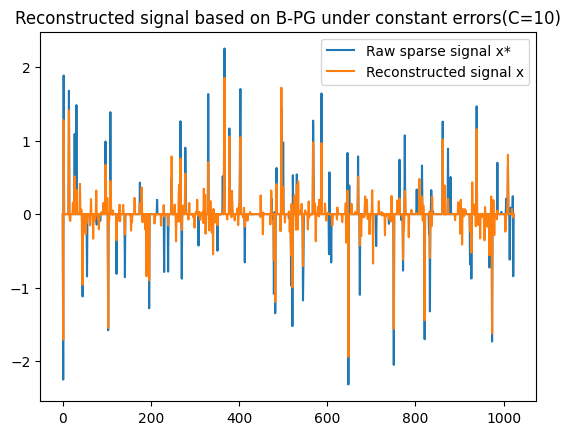

In [20]:
step = 0.0011
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

seed = 2
np.random.seed(seed)
r = np.random.random((int(p/n),1))


t0 = time.time()

xt = x0
e_pi = np.zeros((1,T))      # ||x-x*||_2^2
for t in range(T):          # 迭代T次
    xti = xt
    e_pi[0,t] = (np.linalg.norm(xti-u)**2)/q     # ||x-x*||_2^2
            
    for i in range(n):      # n个(y,A)
        et = Ci * r
        y[i] = np.dot(a[i],u) + et
        g0 = np.dot(xti.T, np.dot(a[i].T,a[i])) - np.dot(y[i].T,a[i])  # 光滑项梯度
        # g0 = g0/np.linalg.norm(g0)
        xti = xti - step * g0.T
    
    xt = prox(xti, lambd)
    
t1 = time.time()
t_pi = t1 - t0
plt.plot(u, label='Raw sparse signal x*')
plt.plot(xt, label='Reconstructed signal x')
plt.legend()
plt.title('Reconstructed signal based on B-PG under constant errors(C=10)')

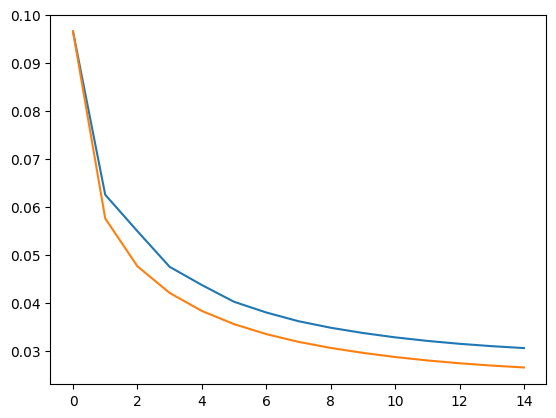

In [21]:
plt.plot(e_B[0])
plt.plot(e_pi[0])
# plt.plot(e_pit[0])

T_N_pit

0.025013976331187716


Text(0.5, 1.0, 'Reconstructed signal based on PG-RR under constant errors(C=10)')

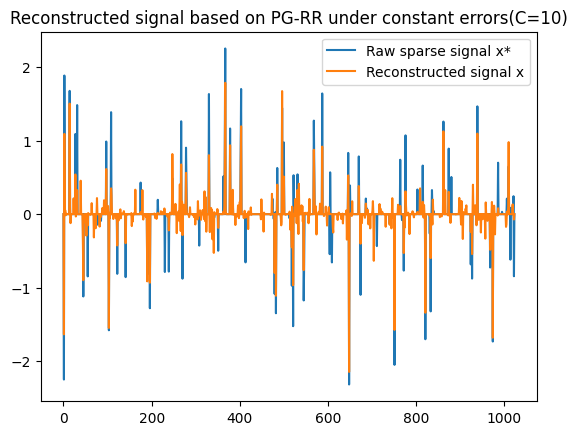

In [22]:
step = 0.0011
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1

seed = 2
np.random.seed(seed)
r = np.random.random((int(p/n),1))

t0 = time.time()

xt = x0
e_pit = np.zeros((1,T))      # ||x-x*||_2^2

for t in range(T):          # 迭代T次
    xti = xt
    e_pit[0,t] = (np.linalg.norm(xti-u)**2)/q     # ||x-x*||_2^2
            
    # (A,y)随机排列
    x = np.arange(0,n)
    random.shuffle(x)
    A_ = np.zeros_like(a)
    y_ = np.zeros_like(y)
    for m in range(len(a)):
        A_[m] = a[x[m]]
        y_[m] = y[x[m]]      
            
            
    for i in range(n):      # n个(y,A)
        et = Ci * r
        y_[i] = np.dot(A_[i],u) + et
        
        g0 = np.dot(xti.T, np.dot(A_[i].T,A_[i])) - np.dot(y_[i].T,A_[i])  # 光滑项梯度
        # g0 = g0/np.linalg.norm(g0)
        xti = xti - step * g0.T
    
    xt = prox(xti, lambd)
print(e_pit[0,T-1])
t1 = time.time()
t_pit = t1 - t0
plt.plot(u, label='Raw sparse signal x*')
plt.plot(xt, label='Reconstructed signal x')
plt.legend()
plt.title('Reconstructed signal based on PG-RR under constant errors(C=10)')

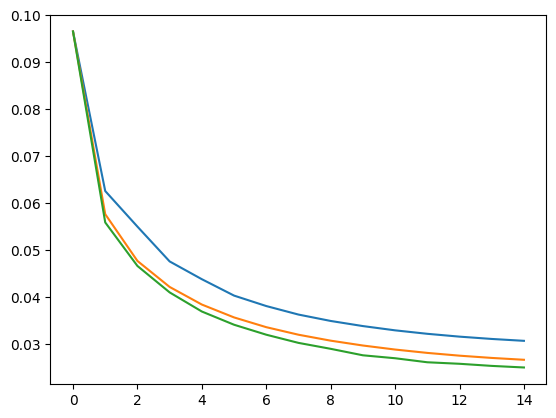

In [23]:
plt.plot(e_B[0])
plt.plot(e_pi[0])
plt.plot(e_pit[0])
# plt.plot(e_spg.T)

SPG

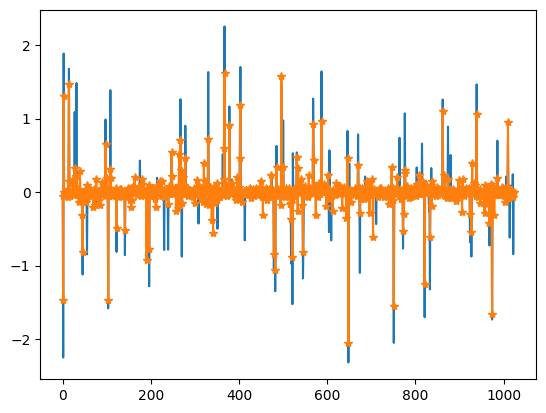

In [24]:
step = 0.0009
# 初始化x
seed = 1
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1
lambd2 = lambd/n
t0 = time.time()

seed = 2
np.random.seed(seed)
r = np.random.random((int(p/n),1))

xt = x0
e_spg = np.zeros((1,T))      # ||x-x*||_2^2

for t in range(T):          # 迭代T次
    xti = xt
    e_spg[0,t] = (np.linalg.norm(xti-u)**2)/q     # ||x-x*||_2^2
        
    for i in range(n):     
        et = Ci * r
        y[i] = np.dot(a[i],u) + et

            
    for i in range(n):      # n个(y,A)
        m = random.randint(0, n-1)
        g0 = np.dot(xti.T, np.dot(a[m].T,a[m])) - np.dot(y[m].T,a[m])   # 光滑项梯度
        xti = xti - step * g0.T
        xti = prox(xti, lambd2)
    
    xt = xti
    
    
t1 = time.time()
t_spg = t1 - t0
plt.plot(u)
plt.plot(xt, "*-")

ADMM_T_n

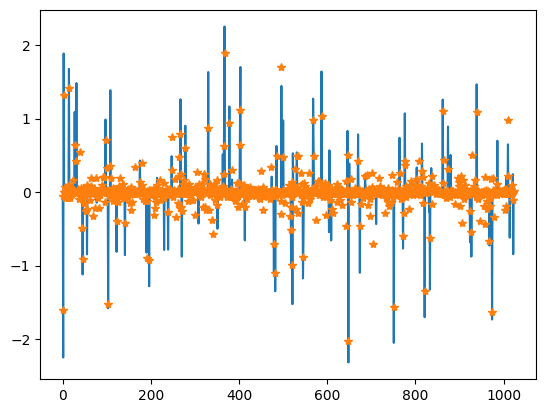

In [25]:
rho = 20

# 初始化x
seed = 8
np.random.seed(seed)
x0 = (2.0*np.random.random((q,1)) - 1.0)*0.1
seed = 2
np.random.seed(seed)
r = np.random.random((int(p/n),1))


e_ADMM = np.zeros((n,T))      # ||x-x*||_2^2
t0 = time.time()
x = x0

z = x
w = np.random.rand(q,1)     # (1024,1)
E = np.identity(q)

for t in range(T):
    # print(t)
    for i in range(n):
        et = Ci * r
        y[i] = np.dot(a[i],u) + et
        e_ADMM[i,t] = (np.linalg.norm(x-u)**2)/q     # ||x-x*||_2^2
        x = np.dot(np.linalg.inv(np.dot(a[i].T, a[i]) + rho*E),(np.dot(a[i].T,y[i]) + rho*(z - w)))
        z = prox(x + w, lambd/rho)
        w = w + x - z
        
t1 = time.time()
t_ADMM = t1 - t0
plt.plot(u)
plt.plot(x, "*")

time:B,pi,pit,ADMM: 0.27820682525634766 2.04813814163208 2.0284712314605713 29.952285528182983


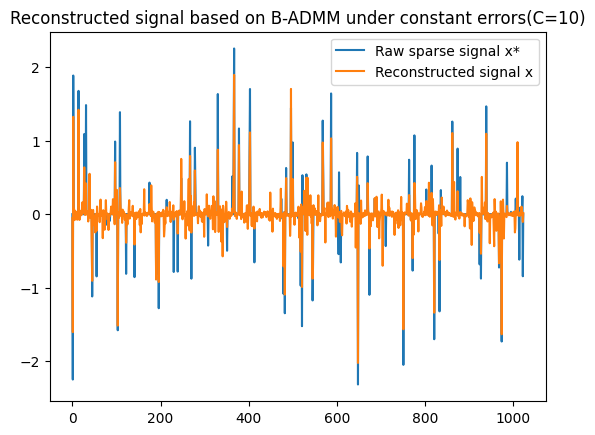

In [26]:
plt.plot(u, label='Raw sparse signal x*')
plt.plot(x, label='Reconstructed signal x')
plt.legend()
plt.title('Reconstructed signal based on B-ADMM under constant errors(C=10)')
print('time:B,pi,pit,ADMM:', t_B, t_pi, t_pit, t_ADMM)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time3:B,pi,pit,ADMM,SIPG: 0.27820682525634766 2.04813814163208 2.0284712314605713 29.952285528182983 4.3986639976501465


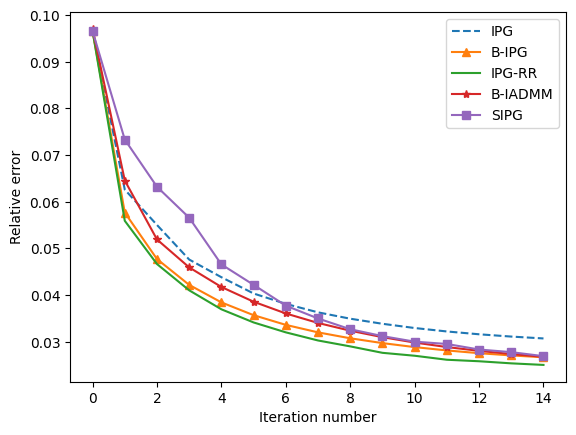

In [28]:
plt.plot(e_B[0],'--',label='IPG')
plt.plot(e_pi[0],'^-',label='B-IPG',color='#ff7f0e')
plt.plot(e_pit[0],label='IPG-RR',color='#2ca02c')
# plt.plot(e_N_T,label='n-T')
plt.plot(e_ADMM[0],'*-',label='B-IADMM',color='#d62728')
plt.plot(e_spg.T,'s-',label='SIPG',color='#9467bd')
plt.legend()
# plt.title('Convergence of algorithms with constant error(C=10)')
plt.xlabel('Iteration number')
plt.ylabel('Relative error')
print('time3:B,pi,pit,ADMM,SIPG:', t_B, t_pi, t_pit, t_ADMM,t_spg)
plt.savefig('./const_e_10.eps', format='eps', dpi=1000)